<a href="https://colab.research.google.com/github/NoeliaFerrero/Proyecto_MentoriaFAMAF_2023/blob/main/Bar_and_Categorical_Data_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="float:left; border:none">
   <tr style="border:none">
       <td style="border:none">
           <a href="https://bokeh.org/">     
           <img
               src="assets/bokeh-transparent.png"
               style="width:50px"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>07. Bar and Categorical Data Plots</h2></div>

In [ ]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

## Basic Bar Charts

Bar charts are a common and important type of plot. Bokeh makes it simple to create all sorts of stacked or nested bar charts, and to deal with categorical data in general.

The example below shows a simple bar chart created using the `vbar` method for drawing vertical bars. (There is a corresponding `hbar` for horizontal bars.) We also set a few plot properties to make the chart look nicer, see chapter [Styling and Theming](02 - Styling and Theming.ipynb) for information about visual properties.

In [ ]:
# Here is a list of categorical values (or factors)
fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']

# Set the x_range to the list of categories above
p = figure(x_range=fruits, height=250, title="Fruit Counts")

# Categorical values can also be used as coordinates
p.vbar(x=fruits, top=[5, 3, 4, 2, 4, 6], width=0.9)

# Set some properties to make the plot look better
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

When we want to create a plot with a categorical range, we pass the ordered list of categorical values to `figure`, e.g. `x_range=['a', 'b', 'c']`. In the plot above, we passed the list of fruits as `x_range`, and we can see those refelected as the x-axis.

The `vbar` glyph method takes an `x` location for the center of the bar, a `top` and `bottom` (which defaults to 0), and a `width`. When we are using a categorical range as we are here, each category implicitly has width of 1, so setting `width=0.9` as we have done here makes the bars shrink away from each other. (Another option would be to add some padding to the range.)

In [ ]:
# Exercise: Create your own simple bar chart


Since `vbar` is a glyph method, we can use it with a `ColumnDataSource` just as we would with any other glyph. In the example below, we put the data (including color data) in a `ColumnDataSource` and use that to drive our plot. We also add a legend, see chapter [Adding Annotations.ipynb](03 - Adding Annotations.ipynb) for more information about legends and other annotations.

In [ ]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

p = figure(x_range=fruits, height=250, y_range=(0, 9), title="Fruit Counts")
p.vbar(x='fruits', top='counts', width=0.9, color='color', legend_field="fruits", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [ ]:
# Exercise: Create your own simple bar chart driven by a ColumnDataSource


## Stacked Bars

It's often desirable to stack bars together. Bokeh makes this straightforward using the `vbar_stack` and `hbar_stack` methods. When passing data to one of these methods, the data source should have a series for each "row" in the stack. You will provide an ordered list of column names to stack together from the data source.

In the example below, we see simulated data for fruit exports (positive values) and imports (negative values) stacked using two calls to `hbar_stack`. The values in the columns for each year are ordered according to the `fruits`, i.e. this is not a "tidy" data format.

In [ ]:
from bokeh.palettes import GnBu3, OrRd3

years = ['2015', '2016', '2017']

exports = {'fruits' : fruits,
           '2015'   : [2, 1, 4, 3, 2, 4],
           '2016'   : [5, 3, 4, 2, 4, 6],
           '2017'   : [3, 2, 4, 4, 5, 3]}
imports = {'fruits' : fruits,
           '2015'   : [-1, 0, -1, -3, -2, -1],
           '2016'   : [-2, -1, -3, -1, -2, -2],
           '2017'   : [-1, -2, -1, 0, -2, -2]}

p = figure(y_range=fruits, height=250, x_range=(-16, 16), title="Fruit import/export, by year")

p.hbar_stack(years, y='fruits', height=0.9, color=GnBu3, source=ColumnDataSource(exports),
             legend_label=["%s exports" % x for x in years])

p.hbar_stack(years, y='fruits', height=0.9, color=OrRd3, source=ColumnDataSource(imports),
             legend_label=["%s imports" % x for x in years])

p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "center_left"

show(p)

Notice we also added some padding *around* the categorical range (e.g. at both ends of the axis) by specifying

```
p.y_range.range_padding = 0.1
```

In [ ]:
# Create a stacked bar chart with a single call to vbar_stack


## Grouped Bar Charts

Sometimes we want to group bars together, instead of stacking them. Bokeh can handle up to three levels of nested (hierarchical) categories, and will automatically group output according to the outermost level. To specify nested categorical coordinates, the columns of the data source should contain tuples, for example:

    x = [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
    
Values in other columns correspond to each item in `x`, exactly as in other cases. When plotting with these kinds of nested coordinates, we must tell Bokeh the contents and order the axis range, by explicitly passing a `FactorRange` to `figure`. In the example below, this is seen as

    p = figure(x_range=FactorRange(*x), ....)
    

In [ ]:
from bokeh.models import FactorRange

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
years = ['2015', '2016', '2017']

data = {'fruits' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 3, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['2015'], data['2016'], data['2017']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), height=250, title="Fruit Counts by Year")

p.vbar(x='x', top='counts', width=0.9, source=source)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [ ]:
# Exercise: Make the chart above have a different color for each year by adding colors to the ColumnDataSource


Another way we can set the color of the bars is to use a transform. We first saw some transforms in previous chapter [Data Sources and Transformations](04 - Data Sources and Transformations.ipynb). Here we use a new one `factor_cmap` that accepts a the name of a column to use for colormapping, as well as the palette and factors that define the color mapping.

Additionally we can configure it to map just the sub-factors if desired. For instance in this case we don't want shade each `(fruit, year)` pair differently. Instead, we want to only shade based on the `year`. So we pass `start=1` and `end=2` to specify the slice range of each factor to use when colormapping. Then we pass the result as the `fill_color` value:

```
    fill_color=factor_cmap('x', palette=['firebrick', 'olive', 'navy'], factors=years, start=1, end=2))
```
to have the colors be applied automatically based on the underlying data.

In [ ]:
from bokeh.transform import factor_cmap

p = figure(x_range=FactorRange(*x), height=250, title="Fruit Counts by Year")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",

       # use the palette to colormap based on the the x[1:2] values
       fill_color=factor_cmap('x', palette=['firebrick', 'olive', 'navy'], factors=years, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

It is also possible to achieve grouped bar plots using another technique called "visual dodge". That would be useful e.g. if you only wanted to have the axis labeled by fruit type, and not include the years on the axis. This tutorial does not cover that technique but you can find information in the [User's Guide](https://bokeh.pydata.org/en/dev/docs/user_guide/categorical.html#visual-dodge).

## Mixing Categorical Levels

If you have created a range with nested categories as above, it is possible to plot glyphs using only the "outer" categories, if desired. The plot below shows monthly values grouped by quarter as bars. The data for these are in the familiar format:

    factors = [("Q1", "jan"), ("Q1", "feb"), ("Q1", "mar"), ....]

The plot also overlays a line representing average quarterly values, and this is accomplished by using only the "quarter" part of each nexted category:

    p.line(x=["Q1", "Q2", "Q3", "Q4"], y=....)

In [ ]:
factors = [("Q1", "jan"), ("Q1", "feb"), ("Q1", "mar"),
           ("Q2", "apr"), ("Q2", "may"), ("Q2", "jun"),
           ("Q3", "jul"), ("Q3", "aug"), ("Q3", "sep"),
           ("Q4", "oct"), ("Q4", "nov"), ("Q4", "dec")]

p = figure(x_range=FactorRange(*factors), height=250)

x = [ 10, 12, 16, 9, 10, 8, 12, 13, 14, 14, 12, 16 ]
p.vbar(x=factors, top=x, width=0.9, alpha=0.5)

qs, aves = ["Q1", "Q2", "Q3", "Q4"], [12, 9, 13, 14]
p.line(x=qs, y=aves, color="red", line_width=3)
p.circle(x=qs, y=aves, line_color="red", fill_color="white", size=10)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None

show(p)

## Using Pandas `GroupBy`

We may want to make charts based on the results of "group by" operations. Bokeh can utilize Pandas `GroupBy` objects directly to make this simpler. Let's take a look at how Bokeh deals with `GroupBy` objects by examining the "cars" data set.

In [ ]:
from bokeh.sampledata.autompg import autompg_clean as df

df.cyl = df.cyl.astype(str)
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
0,18.0,8,307.0,130,3504,12.0,70,North America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,North America,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,North America,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,North America,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,North America,ford torino,ford


Suppose we would like to display some values grouped according to `"cyl"`. If we create `df.groupby(('cyl'))` then call `group.describe()` we can see that Pandas automatically computes various statistics for each group.

In [ ]:
group = df.groupby(('cyl'))

group.describe()

mpg                                                        displ  \
     count       mean       std   min    25%    50%    75%   max  count   
cyl                                                                       
3      4.0  20.550000  2.564501  18.0  18.75  20.25  22.05  23.7    4.0   
4    199.0  29.283920  5.670546  18.0  25.00  28.40  32.95  46.6  199.0   
5      3.0  27.366667  8.228204  20.3  22.85  25.40  30.90  36.4    3.0   
6     83.0  19.973494  3.828809  15.0  18.00  19.00  21.00  38.0   83.0   
8    103.0  14.963107  2.836284   9.0  13.00  14.00  16.00  26.6  103.0   

                 ... accel           yr                                    \
           mean  ...   75%   max  count       mean       std   min    25%   
cyl              ...                                                        
3     72.500000  ...  13.5  13.5    4.0  75.500000  3.696846  72.0  72.75   
4    109.670854  ...  18.0  24.8  199.0  77.030151  3.737484  70.0  74.00   
5    145.000000  ...  20.0  20.1    3.0  79.000000  1.000000  78.0  78.50   
6    218.361446  ...  17.6  21.0   83.0  75.951807  3.264381  70.0  74.00   
8    345.009709  ...  14.0  22.2  103.0  73.902913  3.021214  70.0  72.00   

                        
      50%    75%   max  
cyl                     
3    75.0  77.75  80.0  
4    77.0  80.00  82.0  
5    79.0  79.50  80.0  
6    76.0  78.00  82.0  
8    73.0  76.00  81.0  

[5 rows x 48 columns]

Bokeh allows us to create a `ColumnDataSource` directly from Pandas `GroupBy` objects, and when this happens, the data source is automatically filled with the summary values from `group.desribe()`. Observe the column names below, which correspond to the output above.

In [ ]:
source = ColumnDataSource(group)

",".join(source.column_names)

'cyl,mpg_count,mpg_mean,mpg_std,mpg_min,mpg_25%,mpg_50%,mpg_75%,mpg_max,displ_count,displ_mean,displ_std,displ_min,displ_25%,displ_50%,displ_75%,displ_max,hp_count,hp_mean,hp_std,hp_min,hp_25%,hp_50%,hp_75%,hp_max,weight_count,weight_mean,weight_std,weight_min,weight_25%,weight_50%,weight_75%,weight_max,accel_count,accel_mean,accel_std,accel_min,accel_25%,accel_50%,accel_75%,accel_max,yr_count,yr_mean,yr_std,yr_min,yr_25%,yr_50%,yr_75%,yr_max'

Knowing these column names, we can immediately create bar charts based on Pandas `GroupBy` objects. The example below plots the aveage MPG per cylinder, i.e. columns `"mpg_mean"` vs `"cyl"`

In [ ]:
cyl_cmap = factor_cmap('cyl', palette="Spectral5", factors=sorted(df.cyl.unique()))

p = figure(height=350, x_range=group)
p.vbar(x='cyl', top='mpg_mean', width=0.9, line_color="white",
       fill_color=cyl_cmap, source=source)

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "number of cylinders"
p.yaxis.axis_label = "Mean MPG"
p.y_range.start = 0

show(p)

In [ ]:
# Exercise: Use the same dataset to make a similar plot of mean horsepower (hp) by origin


## Categorical Scatterplots

So far we have seen Categorical data used together with various bar glyphs. But Bokeh can use categorical coordinates for most any glyphs. Let's create a scatter plot with categorical coordinates on one axis. The `commits` data set simply has a series datetimes of GitHub commit. Additional columns to express the day and hour of day for each commit have already been added.

In [ ]:
from bokeh.sampledata.commits import data

data.head()

,day,time
datetime,,
2017-04-22 15:11:58-05:00,Sat,15:11:58
2017-04-21 14:20:57-05:00,Fri,14:20:57
2017-04-20 14:35:08-05:00,Thu,14:35:08
2017-04-20 10:34:29-05:00,Thu,10:34:29
2017-04-20 09:17:23-05:00,Thu,09:17:23


To create our scatter plot, we pass the list of categories as the range just as before

    p = figure(y_range=DAYS, ...)
    
Then we can plot circles for each commit, with `"time"` driving the x-coordinate, and `"day"` driving the y-coordinate.

    p.circle(x='time', y='day', ...)

To make the values more distinguishable, we can also add a `jitter` transform to the y-coordinate, which is shown in the complete example below.

In [ ]:
from bokeh.transform import jitter

DAYS = ['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']

source = ColumnDataSource(data)

p = figure(width=800, height=300, y_range=DAYS, x_axis_type='datetime',
           title="Commits by Time of Day (US/Central) 2012—2016")

p.circle(x='time', y=jitter('day', width=0.6, range=p.y_range),  source=source, alpha=0.3)

p.xaxis[0].formatter.days = '%Hh'
p.x_range.range_padding = 0
p.ygrid.grid_line_color = None

show(p)

In [ ]:
# Exercise: Create a plot using categorical coordinates and any non-"bar" glyphs


# Next Section

Click on this link to go to the next notebook: [08 - Graph and Network Plots](08%20-%20Graph%20and%20Network%20Plots.ipynb).

To go back to the overview, click [here](00%20-%20Introduction%20and%20Setup.ipynb).

# Otro ejemplo

El texto es un elemento fundamental en la visualización de datos. Ayuda a establecer un contexto, profundizar una idea, o resaltar un aspecto importante alusivo al contenido de un gráfico.

Increíblemente, y pese a que el texto es un elemento de gran importancia, no siempre le brindamos la atención requerida y en ocasiones lo dejamos con la configuración por defecto al momento de graficar; o peor aún, ni siquiera nos molestamos en incluir alguna etiqueta, comentario o indicación en nuestras visualizaciones.

Esto puede atribuirse a que desconocemos algunas buenas prácticas de diseño y tipografías; o no sabemos cómo implementar esas buenas prácticas en nuestras herramientas de visualización de datos.

En este ejemplo, se encierra al título en un recuadro. El recuadro amarillo no es ornamental, aunque no lo crean tiene una función específica en este diseño. Esta pensado para crear contraste entre el título y el resto de la gráfica; de esa manera podemos encontrar dos entidades diferentes dentro de un todo, uno es el título que nos pondrá en contexto, y el otro la representación gráfica de nuestros datos.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#Data to plot:
x=np.linspace(1,12,12)
y=[341,657,424,363,123,544,176,566,737,861,651,719]

In [ ]:
palette={"primary":"#FEF702",
         "background": "#252525",
         "primary_chart":"#F1F1F1",
         "text_color": "#7F7F7F"}

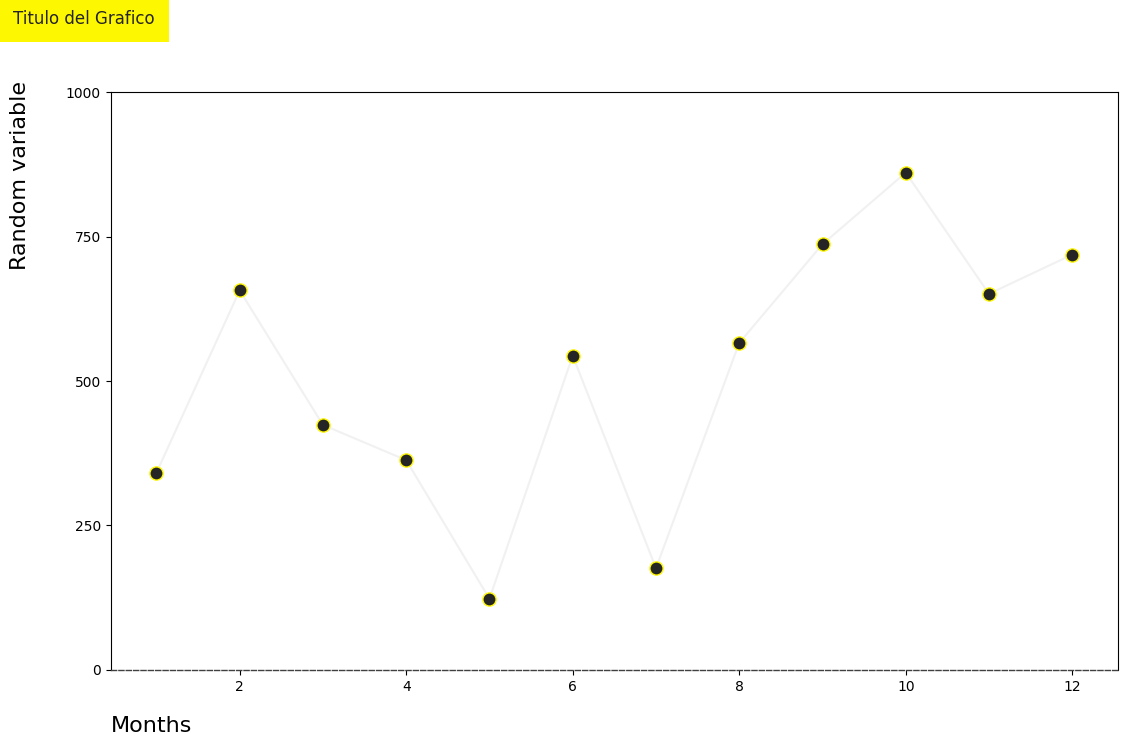

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(13,7.5),dpi=100)

#Chart
ax.plot(x,y,color=palette["primary_chart"],
        zorder=2)
ax.scatter(x,y,color=palette["background"],
           edgecolor=palette["primary"],
            s=90,
           zorder=3)

 #Axes configuration
ax.set_xlabel("Months",
              ha="left",
              size=16)

ax.xaxis.set_label_coords(x=0, y=-0.08, transform=ax.transAxes)

ax.set_ylabel("Random variable",
              ha="right",
              size=16)

ax.yaxis.set_label_coords(x=-0.08, y=1.02, transform=ax.transAxes)
ax.set_ylim(0,1000)

#Plot configuration
plt.locator_params(axis='y', nbins=4)

ax.spines['bottom'].set_linestyle("--")
ax.spines['bottom'].set_linewidth(1)
ax.spines["bottom"].set_color('#404040')

plt.suptitle("Titulo del Grafico",
             horizontalalignment = 'left',
             x=0.05,
             y=0.99,
             transform=fig.transFigure,
             color=palette["background"],
             bbox=dict(facecolor=palette["primary"], edgecolor="none", pad=10.0))

plt.show()

Si ejecutamos el siguiente codigo, obtendremos este gráfico con el formato por defecto de matplotlib… Y seamos honestos, una gráfica con el formato por default no siempre es la mejor manera de comunicar la información.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#Pulling data
df=pd.read_csv("https://raw.githubusercontent.com/moyocoyani/charts_format/master/annotations/datasets/random_dataset.csv")
xtime=df["x"]
ytime=df["y"]
#Annotations
label_xt="Transcurred time(months)"
label_yt="Random variable (units)"
title_t ="Lorem ipsum dolor sit amet."
subtitle_t="Vitae justo eget magna fermentum iaculis eu non."#
yctxt_t =np.round(ytime.max(),1)
context_t=str(yctxt_t)+" "+"Accumsan tortor posuere"

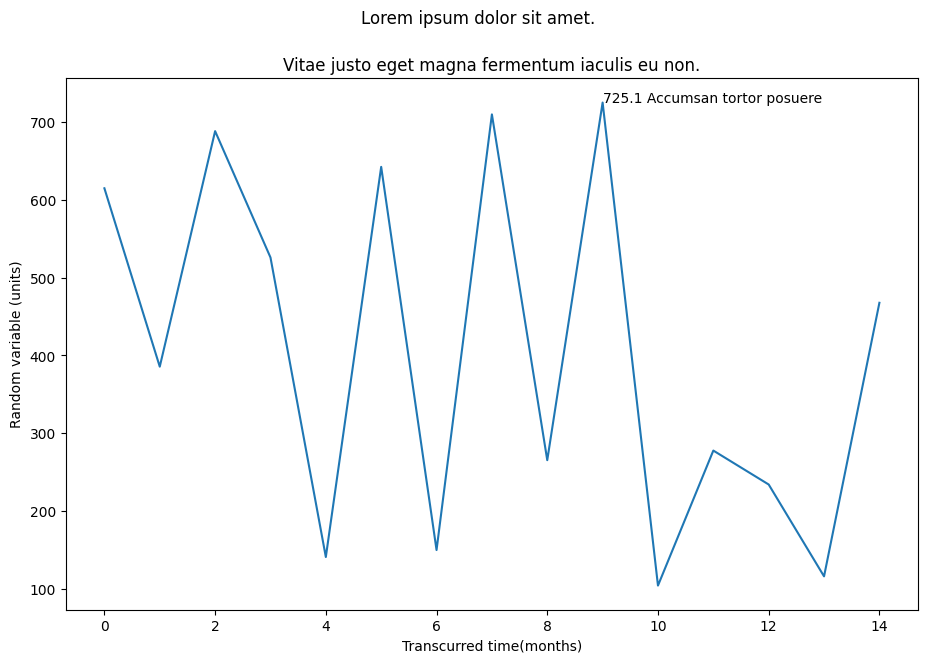

In [ ]:
#canvas: Keep a 16:9 aspect ratio with 100dpi
fig,ax=plt.subplots(1,1,figsize=(11,6.9),dpi=100)

#******DATA
#ploting data
ax.plot(xtime,ytime)

#******TEXT
#axis labels
ax.set_xlabel(label_xt)
ax.set_ylabel(label_yt)

#subtitle
ax.set_title(subtitle_t)

#chart_context
ax.text(x=xtime[np.argmax(ytime)],
        y=ytime.max(),
        s=context_t)

#superior title
plt.suptitle(title_t)

#displaying data
plt.show()

A partir de este punto comenzaremos a dar formato a los elementos de texto. Ya verás que el simple hecho de crear contrastes con el texto le puede dar una mejor presentación a tu gráfica.

In [ ]:
#superior title
plt.suptitle(title_t,
             horizontalalignment = 'left')

Text(0.5, 0.98, 'Lorem ipsum dolor sit amet.')

<Figure size 640x480 with 0 Axes>

In [ ]:
#superior title
plt.suptitle(title_t,
             horizontalalignment = 'left',
             x=0.05,
             y=1,
             transform=fig.transFigure)

Text(0.05, 1, 'Lorem ipsum dolor sit amet.')

<Figure size 640x480 with 0 Axes>

In [ ]:
#subtitle
ax.set_title(subtitle_t,
             loc="left",
             x=0.05,
             y=0.9,
             transform=fig.transFigure)

Text(0.05, 0.9, 'Vitae justo eget magna fermentum iaculis eu non.')

Text(0.05, 0.9, 'Vitae justo eget magna fermentum iaculis eu non.')

In [ ]:
ax.xaxis.set_label_coords(x=0, y=-0.07, transform=ax.transAxes)
ax.yaxis.set_label_coords(x=-0.07, y=1, transform=ax.transAxes)

In [ ]:
#******TEXT
#axis labels
ax.set_xlabel(label_xt,
              ha="left")
ax.xaxis.set_label_coords(x=0, y=-0.07, transform=ax.transAxes)
ax.set_ylabel(label_yt,
              ha="right")
ax.yaxis.set_label_coords(x=-0.07, y=1, transform=ax.transAxes)

In [ ]:
plt.subplots_adjust(top=0.82)

<Figure size 640x480 with 0 Axes>

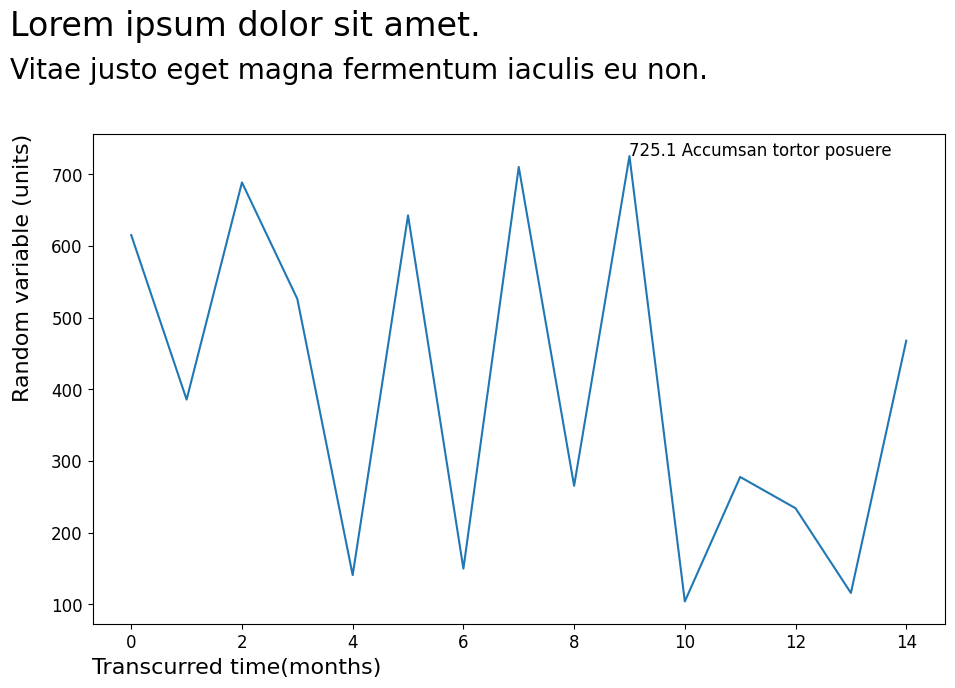

In [ ]:
#canvas: Keep a 16:9 aspect ratio with 100dpi
fig,ax=plt.subplots(1,1,figsize=(11,6.9),dpi=100)
#******DATA
#ploting data
ax.plot(xtime,ytime)
#******TEXT
#axis labels
ax.set_xlabel(label_xt,
              ha="left",
              fontsize=16)
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)
ax.set_ylabel(label_yt,
              ha="right",
              fontsize=16)
ax.yaxis.set_label_coords(x=-0.07,
                          y=1,
                          transform=ax.transAxes)
ax.tick_params(axis='both',
               labelsize=12)
#subtitle
ax.set_title(subtitle_t,
             loc="left",
             x=0.05,
             y=0.9,
             transform=fig.transFigure,
             fontsize=20)
#chart_context
ax.text(x=xtime[np.argmax(ytime)],
        y=ytime.max(),
        s=context_t,
        fontsize=12)
#superior title
plt.suptitle(title_t,
             horizontalalignment = 'left',
             x=0.05,
             y=1,
             transform=fig.transFigure,
             fontsize=24)
plt.subplots_adjust(top=0.82)
#displaying data
plt.show()

¿Observaste cómo mejoró la presentación de un gráfico únicamente por darle formato a los elementos de texto? ¡Excelente! Si eso lo añades a tus conocimientos de visualización de datos estarás dando un paso más hacia una comunicación más eficiente de la información.